<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrices 

In [289]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
import string

1. **Modelo de población de una especie de pajaros** 
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1) 
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros 
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que: 

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix} 
0 & 2 \\
0.3 & 0.5 
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A


##### Aplicando solución general 

\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

In [290]:
#10 hembras y 10 machos
p0 = np.array([0,10])
A = np.array([[0,2],[0.3,0.5]])

In [291]:
# Generalizamos Pn = A^n * p0
Pn = np.linalg.matrix_power(A, 9)@(p0) 

In [292]:
#vectores propios de A y valores propios
eigval, eigvec = np.linalg.eig(A)

In [293]:
#calculamos la inversa de eigvec
inv_eigvec = np.linalg.inv(eigvec)

#Escribimos p0 como combinacion lineal de los vectores propios de A
p0 = inv_eigvec @ (np.array([0,10]))

In [294]:
n = 100 #años 
pn = (eigval[0]**n)*(p0[0]*eigvec[::,0] + (eigval[1]/eigval[0])**n)*p0[1]*eigvec[::,1]
convg = pn[0]/pn[1]

In [295]:
print(f'La poblacion estimada de machos y hembras en 100 años es: {np.floor(pn)} y convergen a {convg:.3f} individuos')

La poblacion estimada de machos y hembras en 100 años es: [6041. 3214.] y convergen a 1.880 individuos


2. **Modelo de encriptación** 

Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamano de la matriz de codigo, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje. 

La persona que debe recibir el mensaje conoce la matriz de codigo. El o ellla arrelgan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el numero de elementos en una fila conicide con el tamano de la matriz de codigo muplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588, 

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?

In [296]:
A = np.array([[ 1,  2, -3,  4,  5],
              [-2, -5,  8, -8, -9],
              [ 1,  2, -2,  7,  9],
              [ 1,  1,  0,  6, 12],
              [ 2,  4, -6,  8, 11]])

In [297]:
mensaje = np.array([47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588])
#convertimos mensaje a una matriz de 4x5
mensaje = mensaje.reshape(4,5)

In [298]:
#calculamos inversa de A

inv_A = np.linalg.inv(A)

In [299]:
#calculamos la clave
clave = (mensaje@inv_A).flatten()

In [300]:
#Letras del abecedario
abc = list(string.ascii_lowercase)
abc.append(' ')

#Decodificamos el mensaje
message = ''.join([abc[int(i)] if i-int(i)>0.5 else abc[int(i)-1] for i in clave])
print(r'El mensaje es: ', message)

El mensaje es:  are you having fun  


3. **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br> 
a) Diagonalize $A$.<br> 
b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.<br>
c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.<br> 
d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$


In [301]:
A = np.array([[2,-1,1],[0,3,-1],[2,1,3]])
A

array([[ 2, -1,  1],
       [ 0,  3, -1],
       [ 2,  1,  3]])

In [302]:
#vectores propios de A y valores propios
eigval, eigvec = np.linalg.eig(A)
eigval, eigvec

(array([4.+0.00000000e+00j, 2.+1.68652966e-08j, 2.-1.68652966e-08j]),
 array([[-0.57735027+0.00000000e+00j, -0.57735027+9.73718355e-09j,
         -0.57735027-9.73718355e-09j],
        [ 0.57735027+0.00000000e+00j,  0.57735027+0.00000000e+00j,
          0.57735027-0.00000000e+00j],
        [-0.57735027+0.00000000e+00j,  0.57735027-9.73718355e-09j,
          0.57735027+9.73718355e-09j]]))

In [303]:
#1) Diagonalizamos A
D = eigvec @ np.diag(eigval) @ np.linalg.inv(eigvec)


b)
$\mathbf{r} = e^{At} \mathbf{r}(0) \rightarrow  \mathbf{r} = Ue^{Dt}U^{-1} \mathbf{r}(0) $  
Donde U matriz de autovalores, D matriz diagonal de autovalores y $\mathbf{r}(0)=(1,1,2))$



In [304]:
r0 = np.array([1,1,2])
t = np.linspace(0,2,100)


def r_0(t):
    return eigvec@np.diag(np.e**(eigval*t))@np.linalg.inv(eigvec)@r0

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$

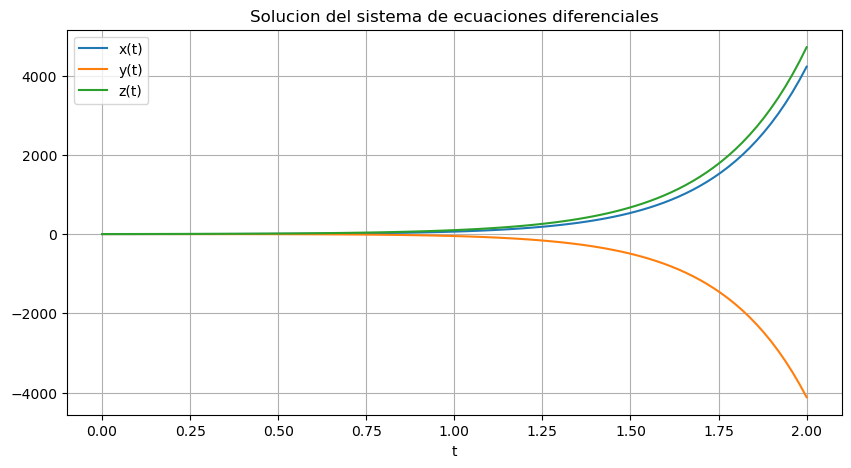

In [305]:
t = np.linspace(0,2,100)
x_t = [r_0(i)[0] for i in t]
y_t = [r_0(i)[1] for i in t]
z_t = [r_0(i)[2] for i in t]



fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(t,x_t,label='x(t)')
ax.plot(t,y_t,label='y(t)')
ax.plot(t,z_t,label='z(t)')
ax.legend()
ax.set_xlabel('t')
ax.set_title('Solucion del sistema de ecuaciones diferenciales')
ax.grid()
plt.show()


d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

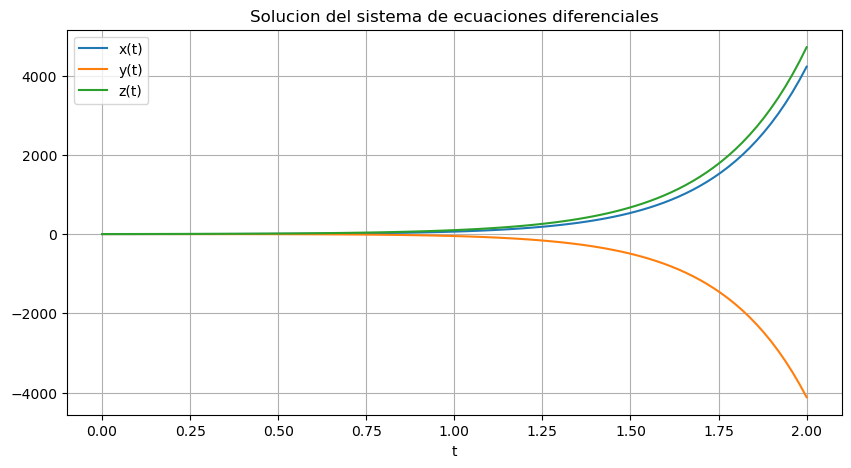

In [306]:
r0 = np.array([1,1,2])
t = np.linspace(0,2,100)

#definimos las funciones analiticas x(t), y(t) y z(t)
def x(t):
    return 0.5*(r0[0]*(np.e**(2*t)*(1+np.e**(2*t)-2*t)) + r0[1]*(-2*t*np.e**(2*t)) + r0[2]*(np.e**(2*t)*(-1+np.e**(2*t))))

def y(t):
    return 0.5*(r0[0]*(-np.e**(2*t)*(-1+np.e**(2*t)-2*t)) + r0[1]*(2*(t+1)*np.e**(2*t)) + r0[2]*(-np.e**(2*t)*(-1+np.e**(2*t))))


def z(t):
    return 0.5*(r0[0]*(np.e**(2*t)*(-1+np.e**(2*t)+2*t)) + r0[1]*(2*t*np.e**(2*t)) + r0[2]*(np.e**(2*t)*(1+np.e**(2*t))))

fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(t,x(t),label='x(t)')
ax.plot(t,y(t),label='y(t)')
ax.plot(t,z(t),label='z(t)')
ax.legend()
ax.set_xlabel('t')
ax.set_title('Solucion del sistema de ecuaciones diferenciales')
ax.grid()
plt.show()

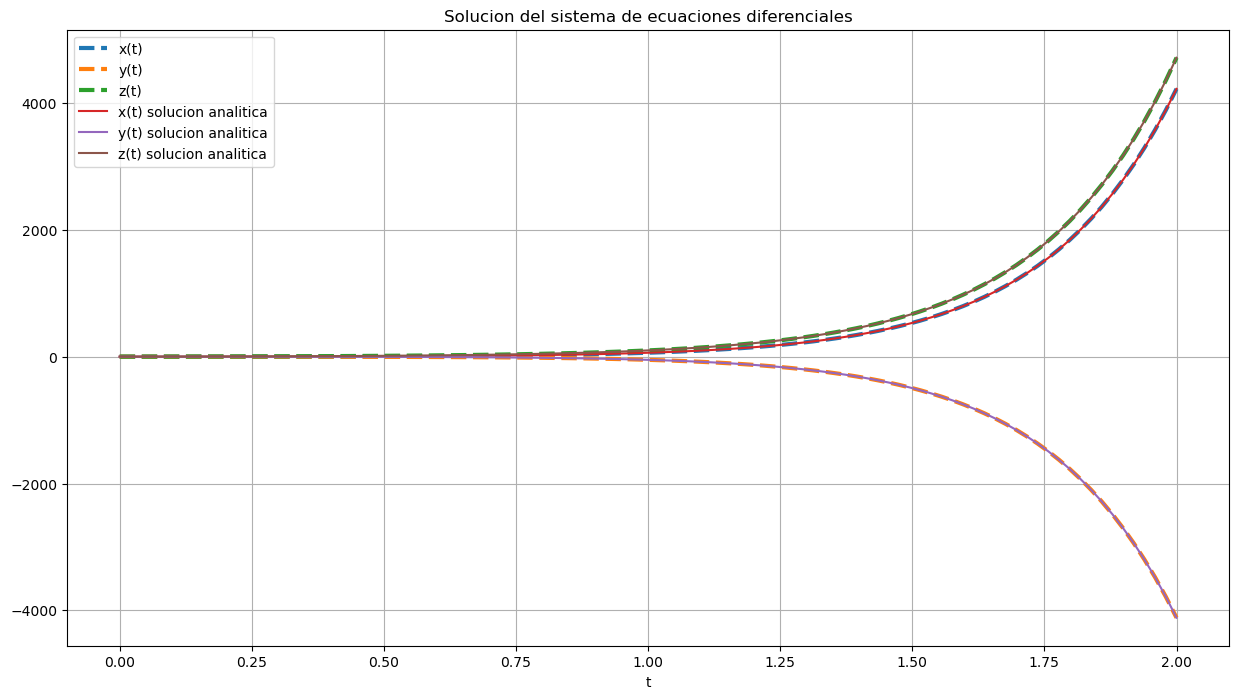

In [307]:
#comparando las dos soluciones
fig , ax = plt.subplots(1,1,figsize=(15,8))
ax.plot(t,x_t,label='x(t)',linestyle='--',linewidth=3)
ax.plot(t,y_t,label='y(t)',linestyle='--',linewidth=3)
ax.plot(t,z_t,label='z(t)',linestyle='--',linewidth=3)
ax.plot(t,x(t),label='x(t) solucion analitica')
ax.plot(t,y(t),label='y(t) solucion analitica')
ax.plot(t,z(t),label='z(t) solucion analitica')
ax.legend()
ax.set_xlabel('t')
ax.set_title('Solucion del sistema de ecuaciones diferenciales')
ax.grid()
plt.show()
